<a href="https://colab.research.google.com/github/maghinha/MVP/blob/main/MVP_de_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP de Análise de Dados e Boas Práticas


## Lucas Maghamez Barbosa

# **1. Definição do Problema**

O dataset usado neste projeto será referente aos **Preços médios de carros - Brasil**, proveniente originalmente da FIPE (https://veiculos.fipe.org.br/).
Seu objetivo é certificar quanto a variação do preço médio dos veículos em reais desde o ano de 2021, praticados na revenda de veículos para o consumidor final, pessoa física, no mercado nacional, servindo apenas como um parâmetro para negociações ou avaliações. Este dataset é um subconjunto do dataset original e aqui, há modelos de veículos de diversos anos, sendo necessariamente das marcas: VW - VolksWagen, Peugeot, Ford, Land Rover, Mercedes-Benz, BMW e Porsche. O dataset apresenta em diversos atributos relacionados aos veículos e seu preço médio em reais. As variáveis ​​preditoras incluem a marca do veículo, o ano modelo, mês de referência da consulta, modelo do carro e assim por diante. Para mais detalhes sobre este dataset, consulte:
https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil




**Sendo os atributos:**

1. **year_of_reference** - Ano de referência


2. **month_of_reference** - Mês de referência da consulta


3. **fipe_code** - Código da tabela fipe


4. **authentication** Código único que autentica a consulta no site da FIPE.


5. **brand** - Marca do carro

6. **model** - Modelo do carro

7. **fuel** - Combustível do carro

8. **gear** - Tipo de câmbio (manual/automático)

9. **engine_size** - Motor do carro

10. **year_model** - Ano modelo do carro

11. **avg_price_brl** - Preço médio em reais


In [2]:
# Importação de pacotes a serem usados no trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib.ticker as ticker
import missingno as ms
import re


# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


# **2. Carga do Dataset**

Será carregado o dataset, de um arquivo .csv, com cabeçalho na primeira linha.

Após carga do dataset, iremos explorá-lo.

In [ ]:
# URL de importação do dataset, diretamente do github em csv
url = "https://raw.githubusercontent.com/maghinha/mvp2/main/fipe_cars_selecionadas_vf.csv"

# Lê o arquivo, informando delimitador (arquivo já com cabeçalho)
dataset = pd.read_csv(url, delimiter=',')

In [ ]:
# exibindo o nome das colunas presentes no dataset
dataset.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [ ]:
# Verficando as primeiras 5 linhas do dataset
dataset.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,009001-8,k4213l6f16p,BMW,318i/iA 1.8 16V,Gasoline,manual,1.8,1998,20705
1,2021,January,009001-8,kbjptznj4kp,BMW,318i/iA 1.8 16V,Gasoline,manual,1.8,1997,18525
2,2021,January,009001-8,jylpgb924bp,BMW,318i/iA 1.8 16V,Gasoline,manual,1.8,1996,17507
3,2021,January,009001-8,jqn7lp27s4p,BMW,318i/iA 1.8 16V,Gasoline,manual,1.8,1995,16917
4,2021,January,009001-8,h8717pz6cfp,BMW,318i/iA 1.8 16V,Gasoline,manual,1.8,1994,15772


# **3. Análise de Dados**



## **3.1. Estatísticas Descritivas**

Iniciarei as análises examinando as dimensões do dataset, suas informações e viisualizações amostrais de determinadas linhas.

In [ ]:
# Verificação  das dimensões do dataset (verificando quantidade de linhas e colunas, respectivamente)
dataset.shape

(216303, 11)

In [ ]:
# Verificação de informações adicionais do dataset, como a presença ou não de dados nulos, tipo de dados por coluna e etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216303 entries, 0 to 216302
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   216303 non-null  int64  
 1   month_of_reference  216303 non-null  object 
 2   fipe_code           216303 non-null  object 
 3   authentication      216303 non-null  object 
 4   brand               216303 non-null  object 
 5   model               216303 non-null  object 
 6   fuel                216303 non-null  object 
 7   gear                216303 non-null  object 
 8   engine_size         216303 non-null  float64
 9   year_model          216303 non-null  int64  
 10  avg_price_brl       216303 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 18.2+ MB


In [ ]:
# Utilizando "dataset.info()" conforme indicado anteriormente, foi possível verificar que todas as linhas estão preenchidas e não há nenhum missing aparente.

# Optei por restriginr a análise neste primeiro momento, apenas para os carros de modelo 2018 do dataset
modelos_2018 = dataset.query("year_model == 2018", engine='python')

# E além dos modelos de 2018, restrição a determinados tipos específicos de carros para fins de comparação
modelos_escolhidos = ['208 Allure 1.2 Flex 12V 5p Mec.', 'Fiesta SEL 1.6 16V Flex Mec. 5p', 'Fusion Titanium 2.0 GTDI Eco. Awd Aut.', 'JETTA R-Line 250 TSI 1.4 Flex 16V Aut.', 'Discovery Sport HSE 2.0 4x4 Diesel Aut.', 'X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut']

modelos_2018_escolhidos = modelos_2018[modelos_2018['model'].isin(modelos_escolhidos)]


In [ ]:
# Após aplicar as restrições anteriores, visualização das 10 primeiras linhas do dataset
modelos_2018_escolhidos.head(10)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
683,2021,January,009229-0,kl7g9z7tg5c6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,192675
1482,2021,February,009229-0,ksg05gff6cc6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,197147
2278,2021,March,009229-0,k0y5rscttyc6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,203534
3070,2021,April,009229-0,ljcjf1t98bc6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,216667
3864,2021,May,009229-0,lk86k82bm0c6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,218309
4662,2021,June,009229-0,lnn91fnj6gc6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,220348
5475,2021,July,009229-0,lt32ktrr3xc6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,224991
6303,2021,August,009229-0,ly23mzvl92c6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,228376
7138,2021,September,009229-0,l03vd640jzc6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,230102
7976,2021,October,009229-0,l5tlqc70fxc6r,BMW,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,Gasoline,automatic,2.0,2018,234112


In [ ]:
# Após aplicar as restrições anteriores, visualização das 10 últimas linhas do dataset
modelos_2018_escolhidos.tail(10)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
195089,2022,April,005503-4,g4kl8c48pcc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,127281
197425,2022,May,005503-4,g3tl02zxhqc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,126648
199767,2022,June,005503-4,g2my7748yjc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,125640
202109,2022,July,005503-4,gy8t3gpmlwc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,122775
204452,2022,August,005503-4,gzd0pc6fp9c6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,122890
206797,2022,September,005503-4,gxsjmfvffgc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,121501
209143,2022,October,005503-4,gxfpvhtykqc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,121203
211495,2022,November,005503-4,gtv5hycbyhc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,119015
213845,2022,December,005503-4,gtxmk4x9k6c6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,119055
216196,2023,January,005503-4,gs1v832xldc6r,VW - VolksWagen,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,Gasoline,automatic,1.4,2018,118319


Pensando nas etapas posteriores, irei realizar uma transformação das linhas que constam os modelos dos carros em coluna, para que assim, posteriormente seja possível fazer um resumo estatístico de melhor qualidade.


In [ ]:
# Nesta linha de código, estarei pivoteando a tabela a partir do data frame, com o intuito de transformar os dados de forma que as colunas especificadas se tornem os novos índices da tabela.
# Neste caso especificamente, ['month_of_reference', 'year_of_reference'] serão os índices, ['model'] são as colunas e ['avg_price_brl'] são os valores a serem agregados, e aggfunc='first' indica que deve ser usado o primeiro valor encontrado em caso de duplicatas.

dataset_tratado = modelos_2018_escolhidos.pivot_table(index=['month_of_reference', 'year_of_reference'], columns='model', values='avg_price_brl', aggfunc='first')

# pd.to_datetime(...): Conversão da string de data no formato "YYYY-MM"
dataset_tratado.index = pd.to_datetime(dataset_tratado.index.map(lambda x: f'{x[1]}-{x[0]}')).strftime('%Y-%m')

# visualização dos dados na nova estrutura apresentada
display (dataset_tratado)


model,208 Allure 1.2 Flex 12V 5p Mec.,Discovery Sport HSE 2.0 4x4 Diesel Aut.,Fiesta SEL 1.6 16V Flex Mec. 5p,Fusion Titanium 2.0 GTDI Eco. Awd Aut.,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut
2021-04,47666,216308,49455,111600,109493,216667
2022-04,55684,242061,58900,124262,127281,238562
2021-08,48860,230463,52843,117416,117360,228376
2022-08,54947,231628,58188,120488,122890,236128
2021-12,53154,237199,55876,121710,124603,237843
2022-12,55795,220991,58671,118318,119055,231284
2021-02,45574,209507,47640,111232,102427,197147
2022-02,55096,240878,58242,123623,127175,239714
2021-01,45335,209001,46727,111071,101596,192675
2022-01,54647,236647,57262,121815,126251,240648


In [ ]:
# Farei um resumo estatístico do dataset, para verificar informações como: média, desvio padrão, mínimo, máximo e os quartis

dataset_tratado.describe()


model,208 Allure 1.2 Flex 12V 5p Mec.,Discovery Sport HSE 2.0 4x4 Diesel Aut.,Fiesta SEL 1.6 16V Flex Mec. 5p,Fusion Titanium 2.0 GTDI Eco. Awd Aut.,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000
mean,52135.040000,228204.52000,55070.640000,118654.600000,118783.680000,228270.400000
std,3679.527183,10105.10508,3940.254707,4328.264519,7794.219293,13343.483475
min,45335.000000,209001.00000,46727.000000,111071.000000,101596.000000,192675.000000
25%,48415.000000,220991.00000,52214.000000,115527.000000,115682.000000,224991.000000
50%,53154.000000,230463.00000,57262.000000,119783.000000,120840.000000,234112.000000
75%,55096.000000,236647.00000,58083.000000,121710.000000,124603.000000,236541.000000
max,57086.000000,242280.00000,59214.000000,124262.000000,128062.000000,240648.000000


Com o resumo estatístico do dataset (dataset_tratado.describe()), entre outros fatos, foi possível observar que **o veículo com o menor valor** dentre os escolhidos no período analisado **foi o modelo "208 Allure 1.2 Flex 12V 5p Mec."** e por outro lado **o de maior valor foi o "Discovery Sport HSE 2.0 4x4 Diesel Aut."** Abaixo, busquei mostrar de forma mais clean e organizada, os valores máximos, mínimos e médias dos modelos.

In [ ]:
# Dados acima referente a valores máximos, mínimos e média me chamaram a atenção. Vou calcular estatísticas específicas abaixo

minimos = dataset_tratado.min()
maximos = dataset_tratado.max()
medias = dataset_tratado.mean()


# Criar um DataFrame com os resultados
estatisticas = pd.DataFrame({
    'Mínimo': minimos,
    'Máximo': maximos,
    'Média': medias
})


# Busquei formatar com funçao, os valores para reais
def formatar_em_reais(valor):
    return f'R$ {valor:.2f}'

# Aplicar a formatação às estatísticas
estatisticas_reais = estatisticas.applymap(formatar_em_reais)

# Exibir as estatísticas formatadas em reais
display(estatisticas_reais)

,Mínimo,Máximo,Média
model,,,
208 Allure 1.2 Flex 12V 5p Mec.,R$ 45335.00,R$ 57086.00,R$ 52135.04
Discovery Sport HSE 2.0 4x4 Diesel Aut.,R$ 209001.00,R$ 242280.00,R$ 228204.52
Fiesta SEL 1.6 16V Flex Mec. 5p,R$ 46727.00,R$ 59214.00,R$ 55070.64
Fusion Titanium 2.0 GTDI Eco. Awd Aut.,R$ 111071.00,R$ 124262.00,R$ 118654.60
JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,R$ 101596.00,R$ 128062.00,R$ 118783.68
X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,R$ 192675.00,R$ 240648.00,R$ 228270.40


Após estruturar essa visualizaço dos dados (com valores mínimo, máximo e média),será possível visualizar gráficamente abaixo esses dados, plotando um gráfico de barras.

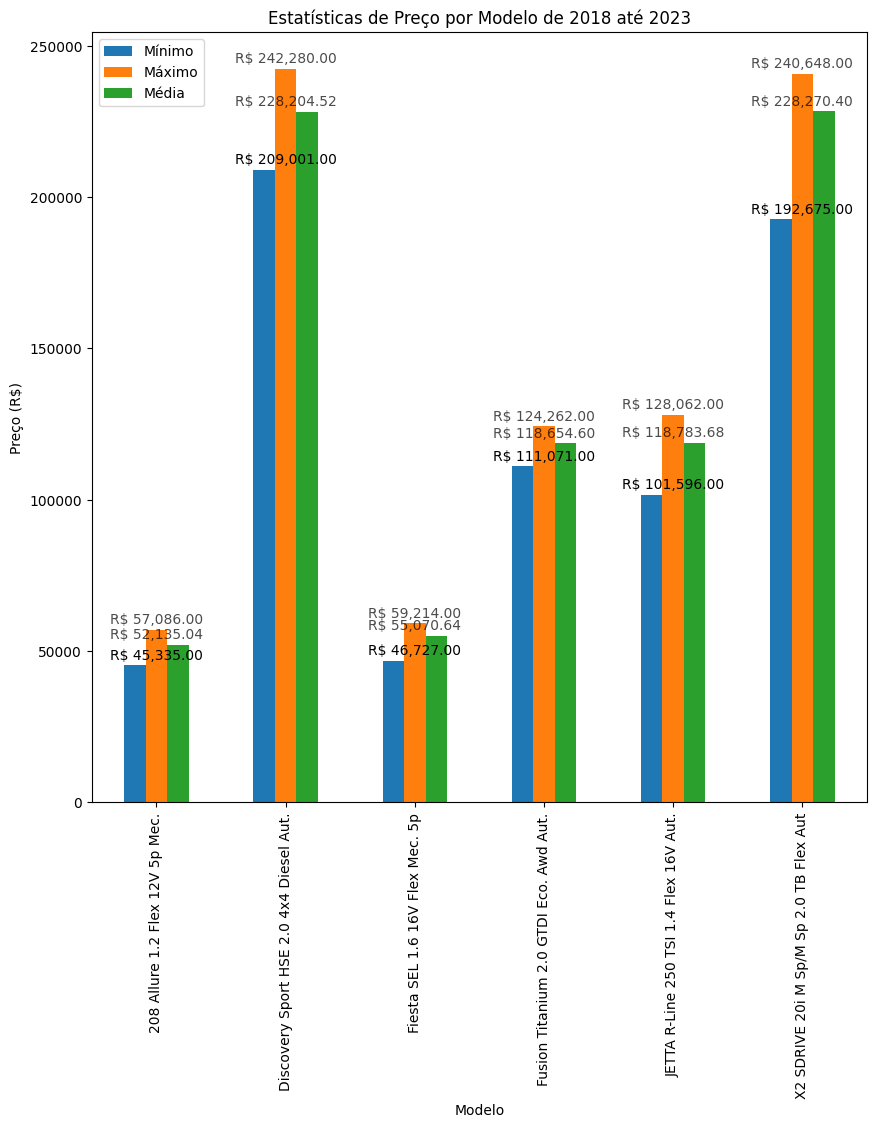

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotagem do gráfico de barras
estatisticas_reais.plot(kind='bar', ax=ax)

# Adicionando rótulos de dados com deslocamento vertical
for i, (v_min, v_max, v_media) in enumerate(zip(estatisticas_reais['Mínimo'], estatisticas_reais['Máximo'], estatisticas_reais['Média'])):
    ax.text(i, v_min + 1000, f'R$ {v_min:,.2f}', ha='center', va='bottom', color='black', fontsize=10)
    ax.text(i, v_max + 1000, f'R$ {v_max:,.2f}', ha='center', va='bottom', color='black', fontsize=10, alpha=0.7)  # Adicionando transparência
    ax.text(i, v_media + 1000, f'R$ {v_media:,.2f}', ha='center', va='bottom', color='black', fontsize=10, alpha=0.7)  # Adicionando transparência

# Adicionando rótulos e título
plt.xlabel('Modelo')
plt.ylabel('Preço (R$)')
plt.title('Preço por Modelo de 2018 até 2023')

# Adicionando legenda
plt.legend()

plt.show()




Após a estruturação do gráfico de barra acima, buscarei entender quais modelos tiveram a maior variação em termos percentuais no período de análise (2018 - 2023)

In [ ]:
# Calculando a variação percentual
estatisticas_reais['Variação Percentual'] = (estatisticas_reais['Máximo'] - estatisticas_reais['Mínimo']) / estatisticas_reais['Mínimo'] * 100

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=estatisticas_reais.index, y='Variação Percentual', data=estatisticas_reais, ax=ax, color='skyblue')

# Adicionando rótulos de dados
for i, v in enumerate(estatisticas_reais['Variação Percentual']):
    ax.text(i, v + 0.5, f'{v:.2f}%', color='black', ha='center')

# Adicionando rótulos e título
plt.xlabel('Modelo')
plt.ylabel('Variação Percentual')
plt.title('Variação Percentual entre Valor Mínimo e Máximo por Modelo')

# Rotacionando rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

plt.show()

NameError: ignored

# **3.2. Visualizações Unimodais**

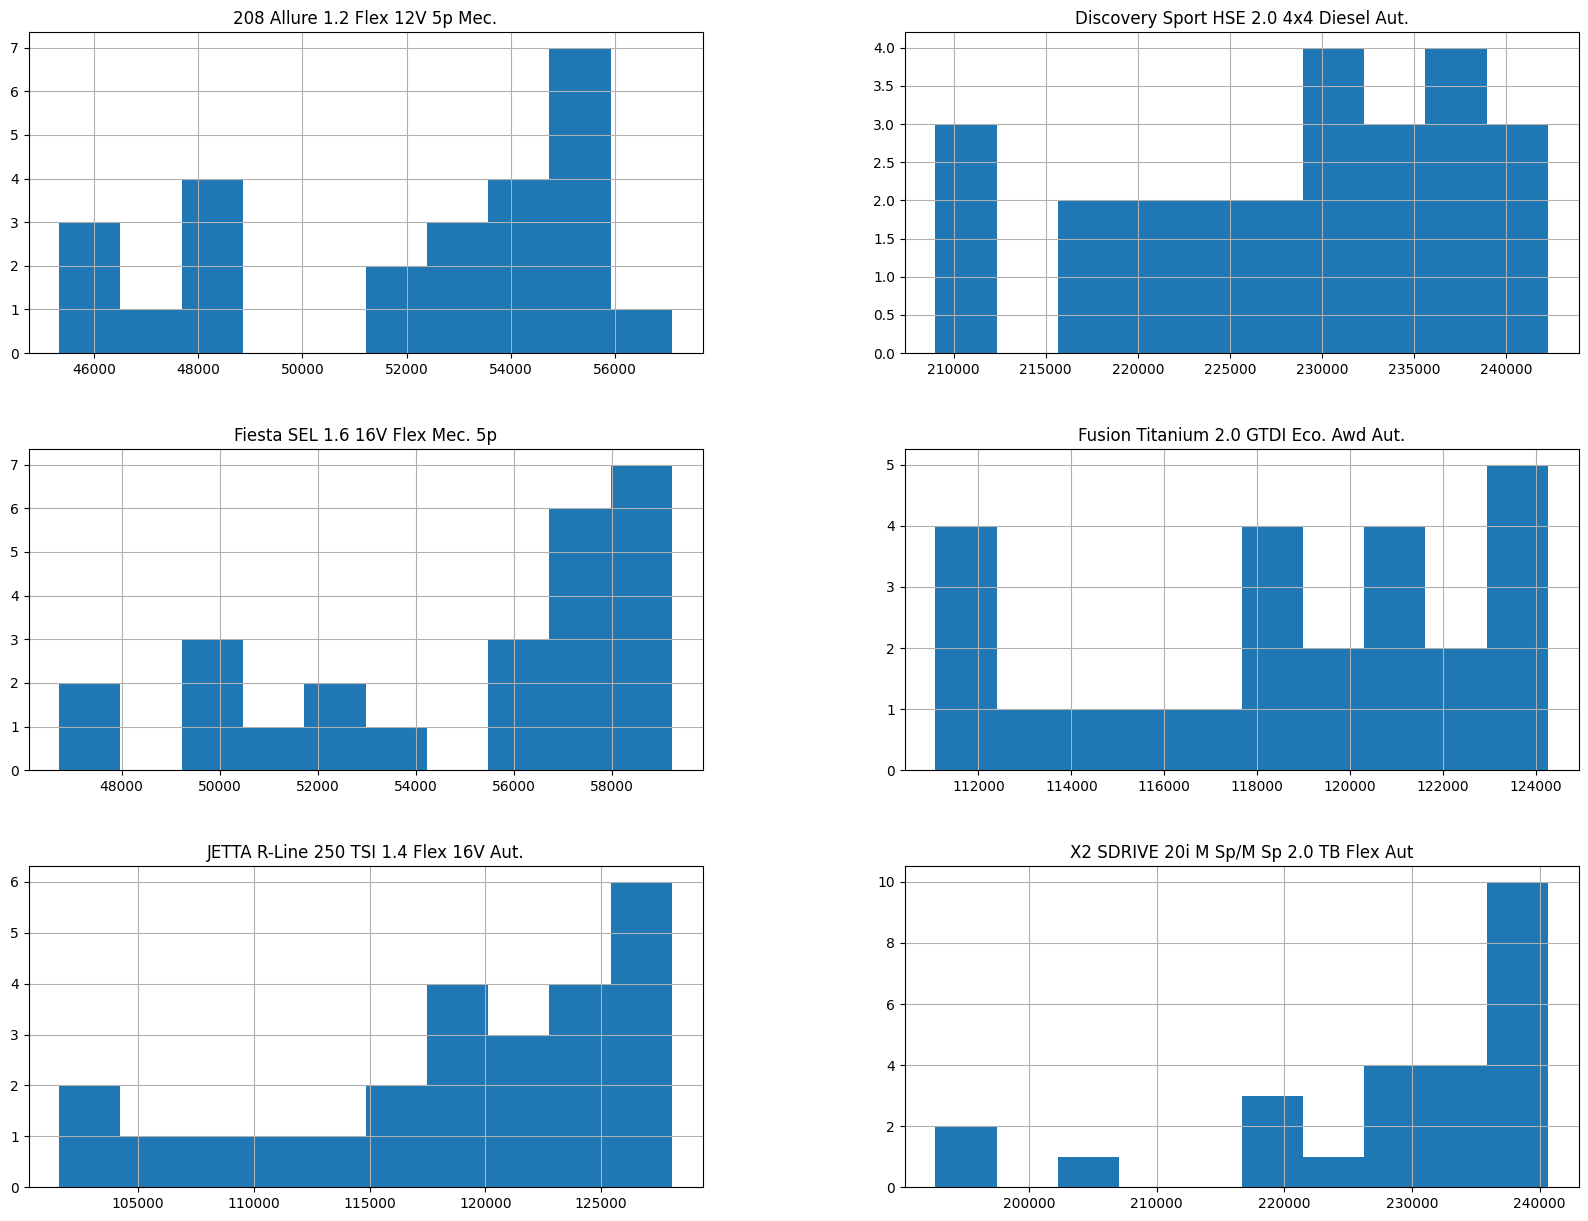

In [ ]:
# Aplicarei histograma para cada modelo do dataset, com o objetivo de visualizar a frequência de preço mês a mês no período analisado, por modelo

dataset_tratado.hist(figsize = (20,15))
plt.show()


Abaixo, irei mostrar o gráfico de Densidade, que se assemelha ao histograma em relação a conceitos mas difere na visualização. Será criado, assim como no histograma, um density plot para atributo do dataset.

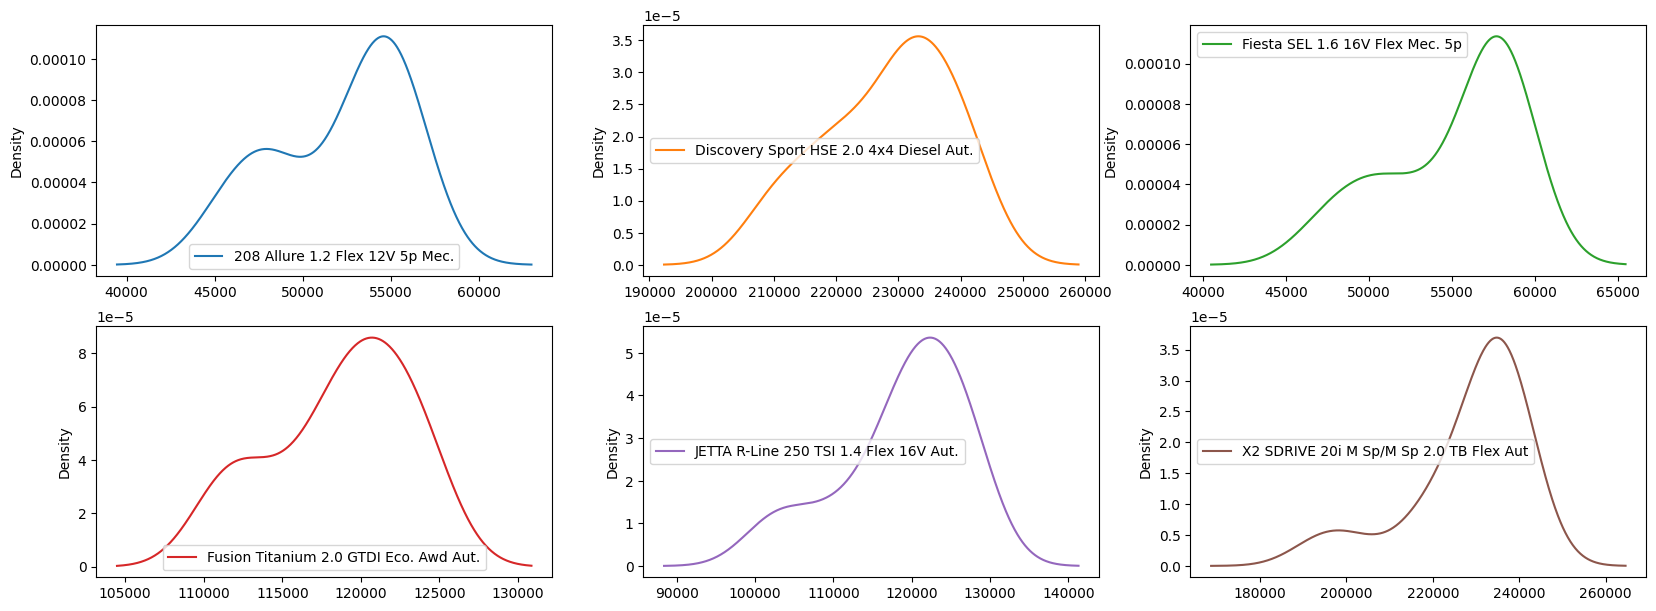

In [ ]:
# Density Plot
dataset_tratado.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (20,15))
plt.show()

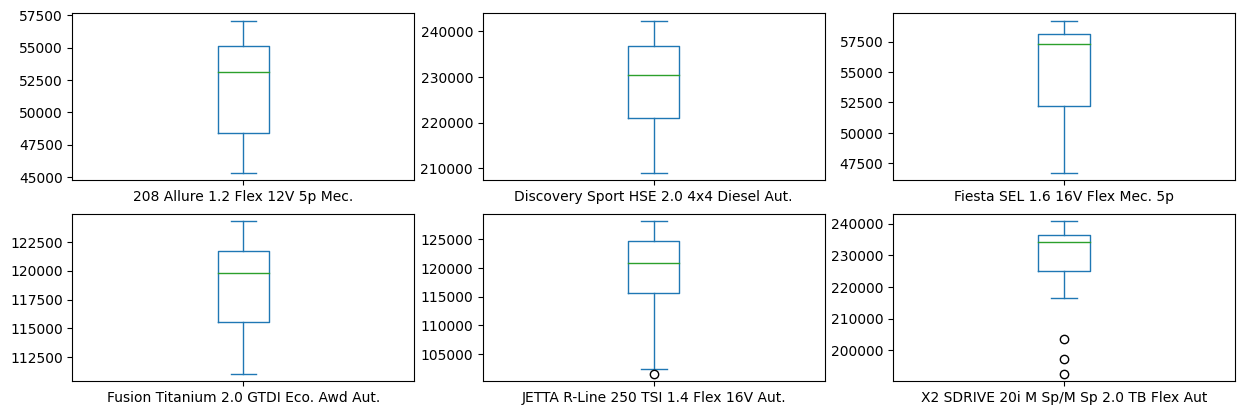

In [ ]:
# Boxplot
dataset_tratado.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

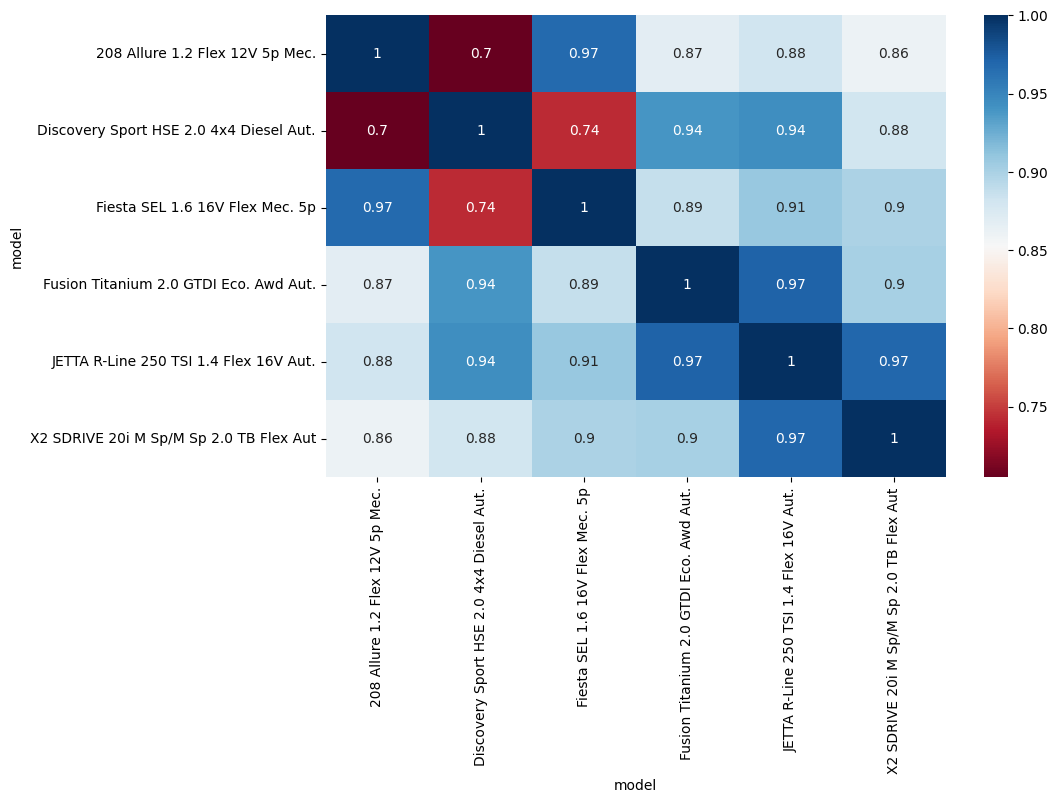

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataset_tratado.corr(), annot=True, cmap='RdBu');

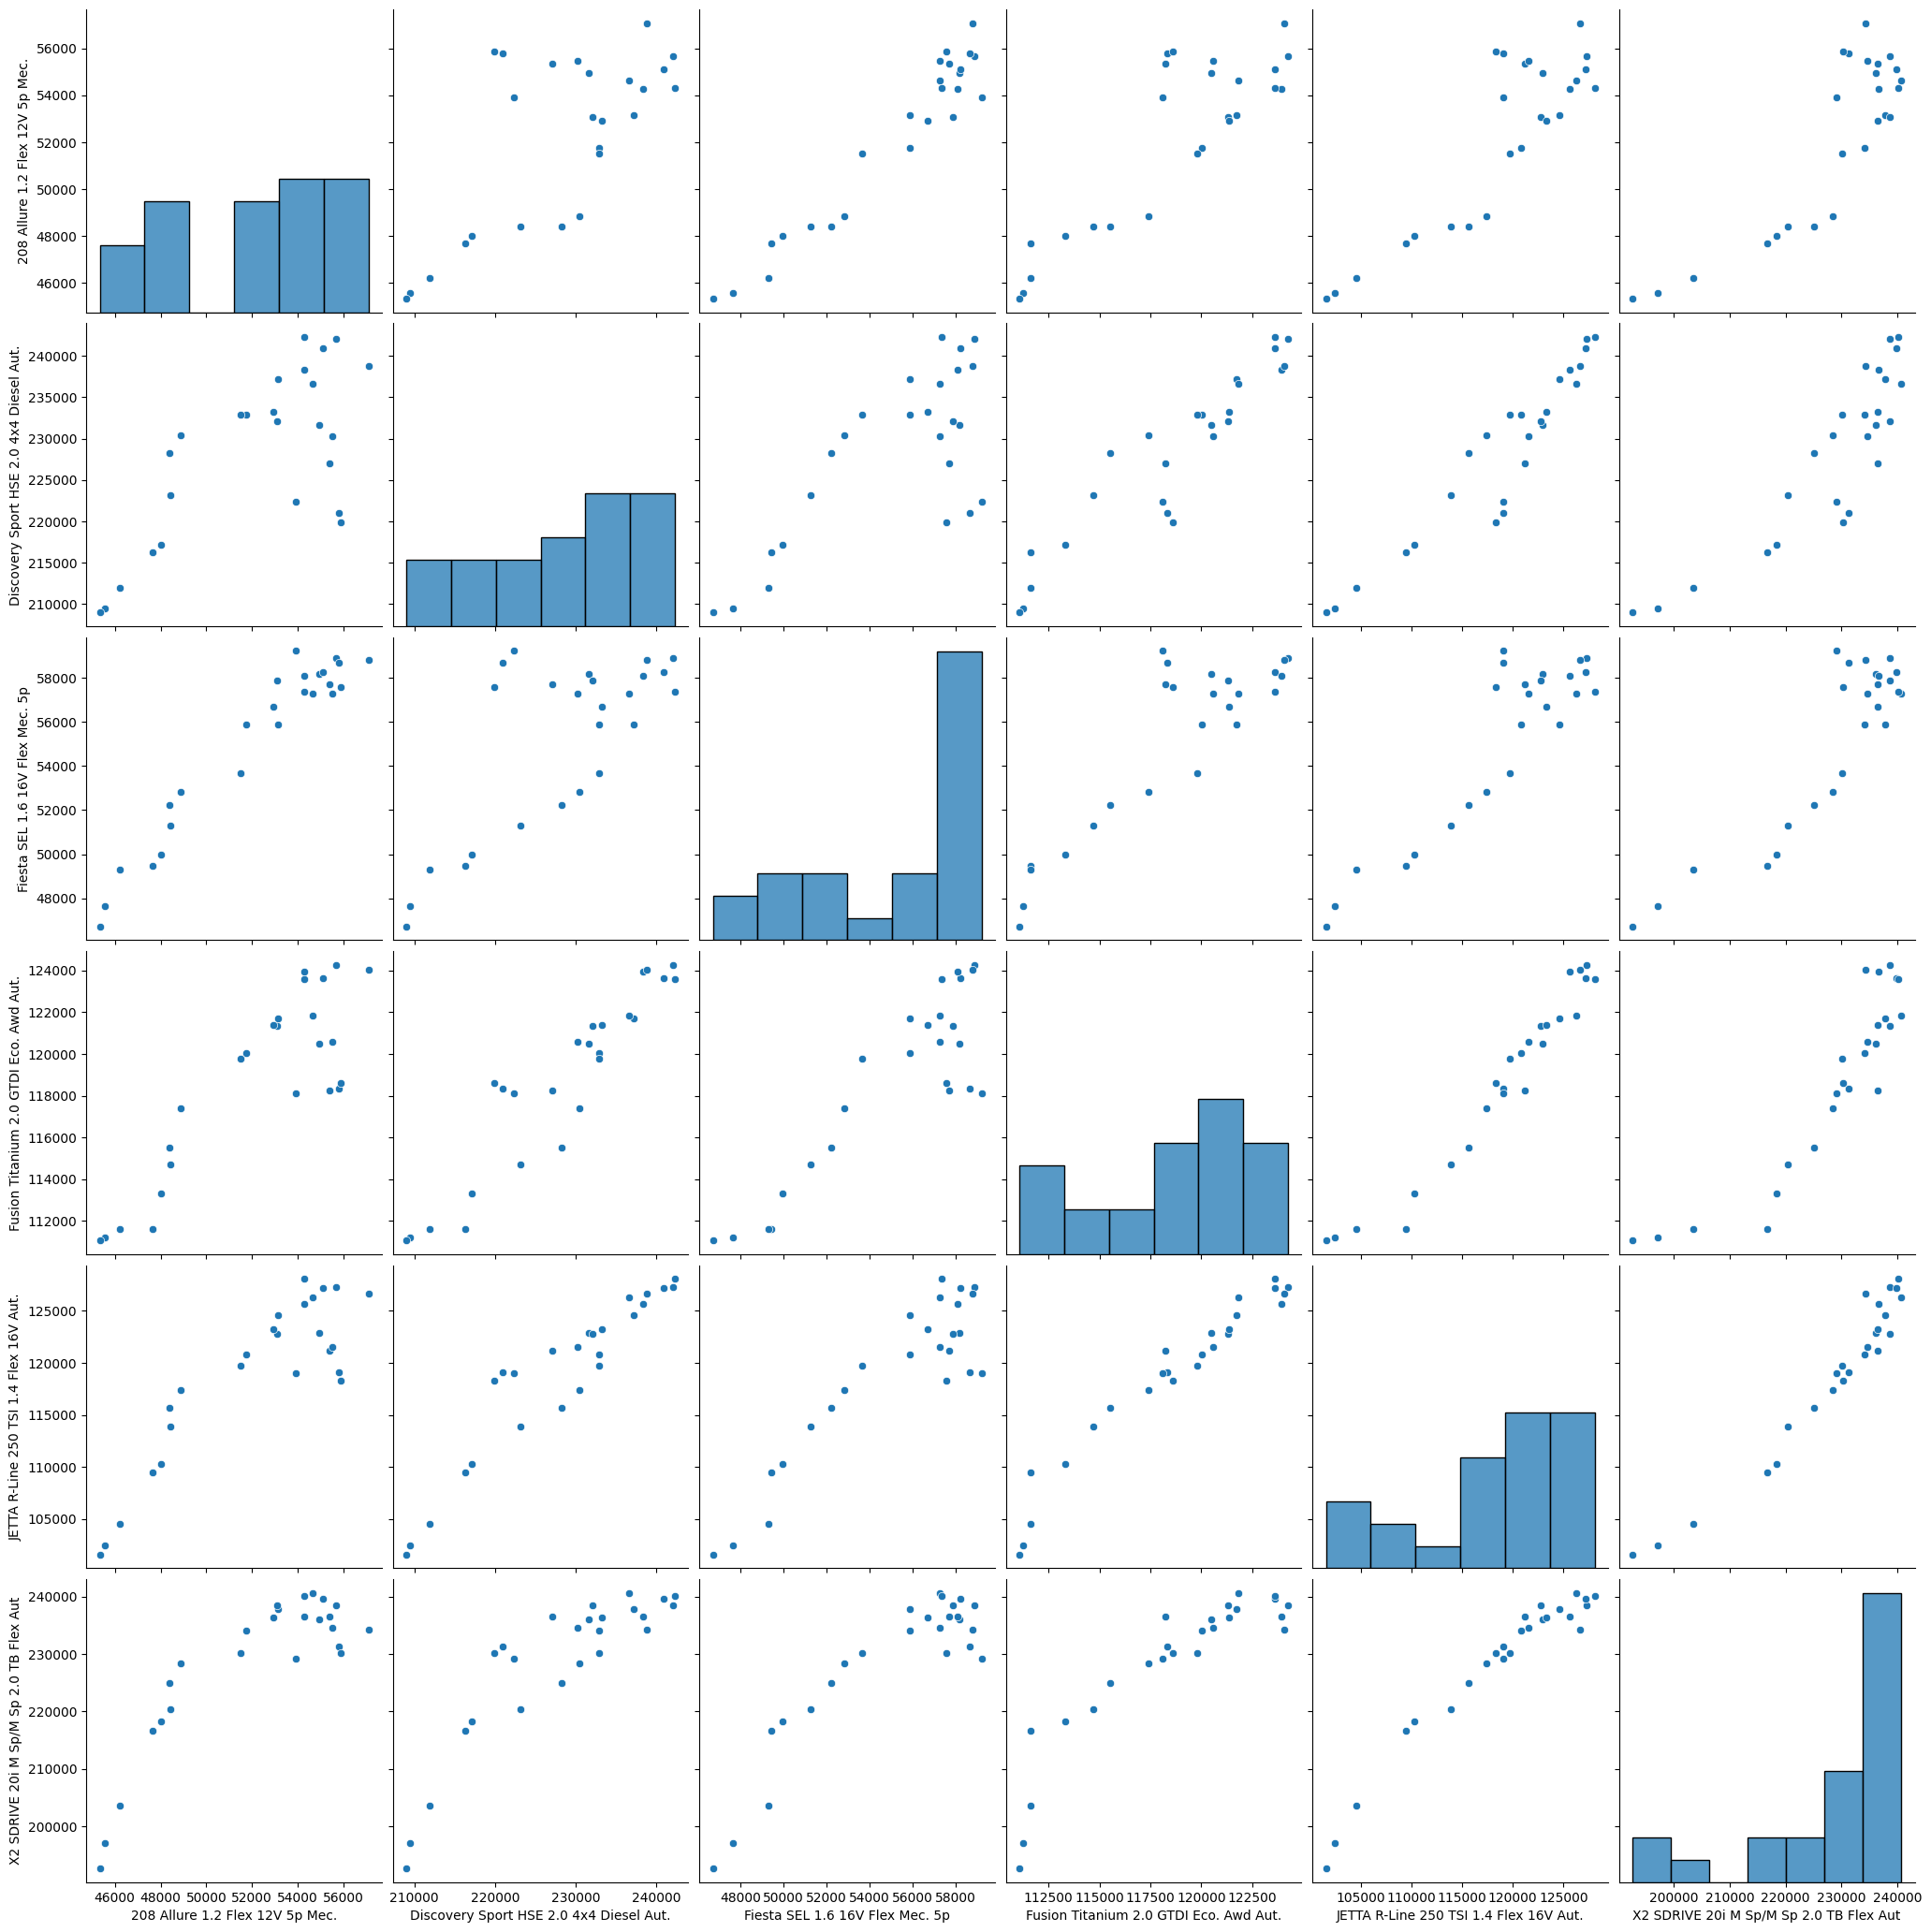

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset_tratado, height=3.5)

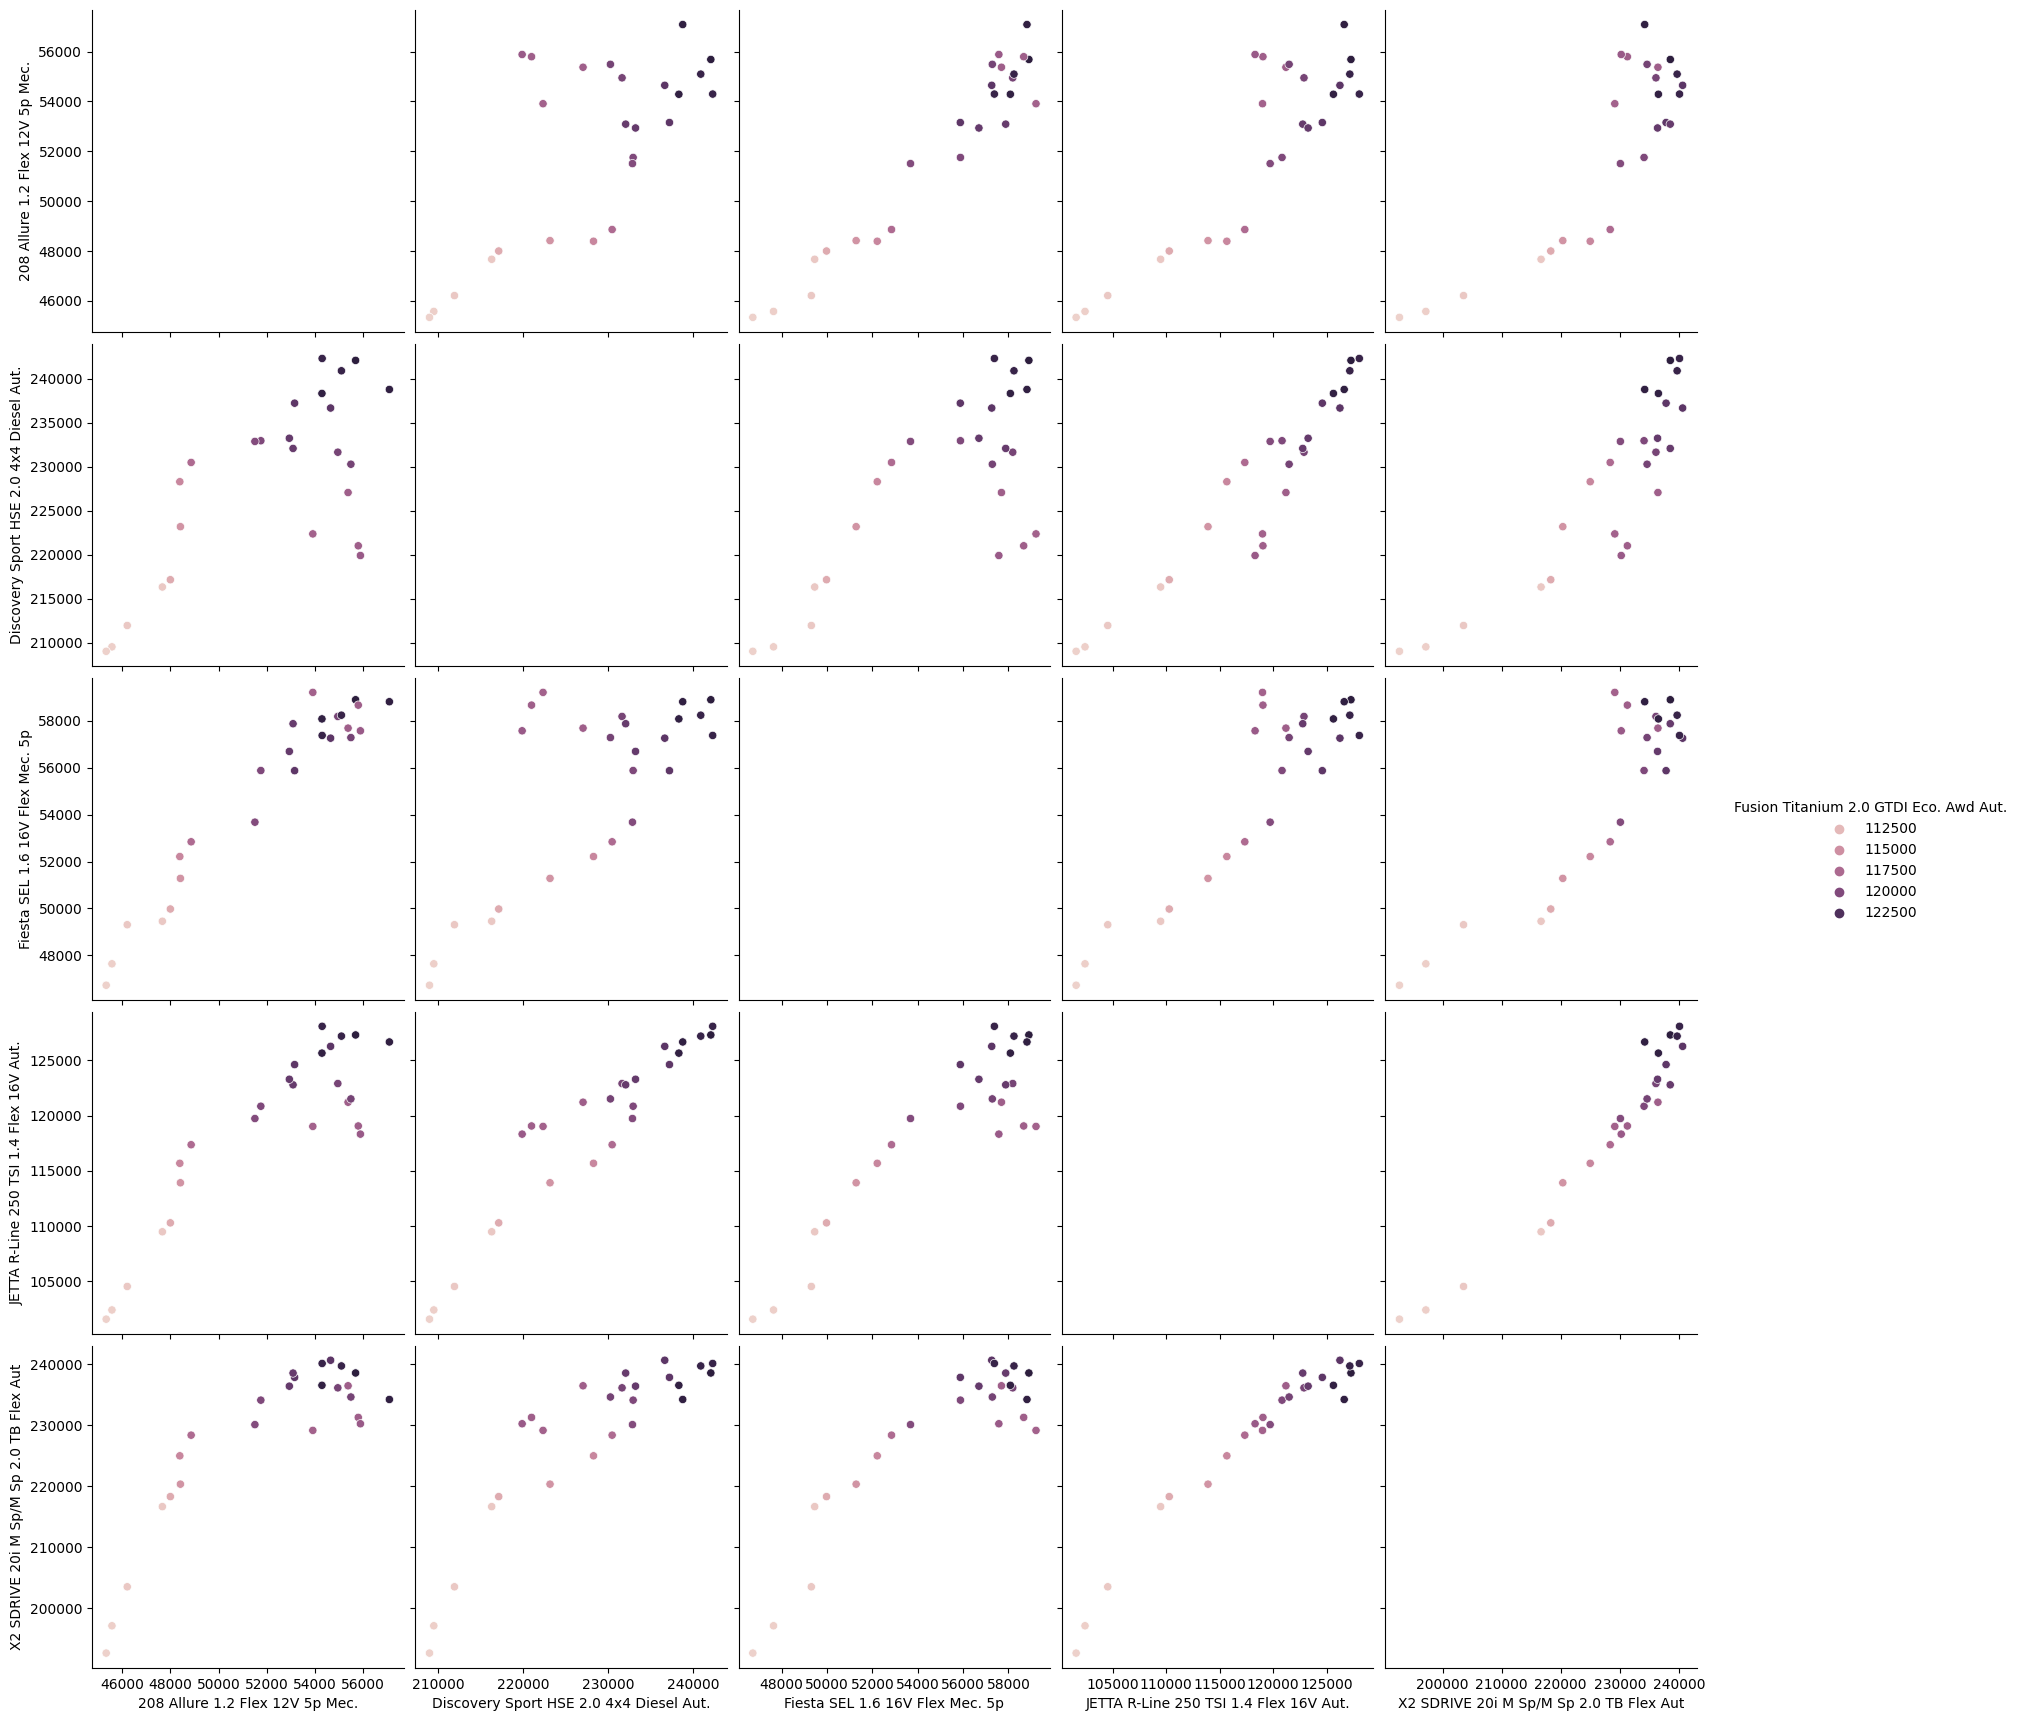

In [ ]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset_tratado, hue = "Fusion Titanium 2.0 GTDI Eco. Awd Aut.", height = 3.5);

In [ ]:
display (dataset_tratado)

model,208 Allure 1.2 Flex 12V 5p Mec.,Discovery Sport HSE 2.0 4x4 Diesel Aut.,Fiesta SEL 1.6 16V Flex Mec. 5p,Fusion Titanium 2.0 GTDI Eco. Awd Aut.,JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut
2021-04-01,47666,216308,49455,111600,109493,216667
2022-04-01,55684,242061,58900,124262,127281,238562
2021-08-01,48860,230463,52843,117416,117360,228376
2022-08-01,54947,231628,58188,120488,122890,236128
2021-12-01,53154,237199,55876,121710,124603,237843
2022-12-01,55795,220991,58671,118318,119055,231284
2021-02-01,45574,209507,47640,111232,102427,197147
2022-02-01,55096,240878,58242,123623,127175,239714
2021-01-01,45335,209001,46727,111071,101596,192675
2022-01-01,54647,236647,57262,121815,126251,240648


In [ ]:
pivot_transposto = dataset_tratado.T

display(pivot_transposto)

Data,2021-04-01,2022-04-01,2021-08-01,2022-08-01,2021-12-01,2022-12-01,2021-02-01,2022-02-01,2021-01-01,2022-01-01,...,2021-03-01,2022-03-01,2021-05-01,2022-05-01,2021-11-01,2022-11-01,2021-10-01,2022-10-01,2021-09-01,2022-09-01
model,,,,,,,,,,,,,,,,,,,,,
208 Allure 1.2 Flex 12V 5p Mec.,47666,55684,48860,54947,53154,55795,45574,55096,45335,54647,...,46209,54296,47998,57086,52935,53909,51752,55372,51506,55489
Discovery Sport HSE 2.0 4x4 Diesel Aut.,216308,242061,230463,231628,237199,220991,209507,240878,209001,236647,...,211933,242280,217135,238758,233213,222343,232930,227044,232851,230261
Fiesta SEL 1.6 16V Flex Mec. 5p,49455,58900,52843,58188,55876,58671,47640,58242,46727,57262,...,49307,57378,49977,58816,56697,59214,55882,57690,53680,57287
Fusion Titanium 2.0 GTDI Eco. Awd Aut.,111600,124262,117416,120488,121710,118318,111232,123623,111071,121815,...,111622,123597,113313,124051,121375,118110,120050,118250,119783,120567
JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,109493,127281,117360,122890,124603,119055,102427,127175,101596,126251,...,104551,128062,110299,126648,123277,119015,120840,121203,119728,121501
X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,216667,238562,228376,236128,237843,231284,197147,239714,192675,240648,...,203534,240121,218309,234222,236402,229156,234112,236464,230102,234625


In [ ]:
tranposta = dataset_tratado.T

display(tranposta)

,2021-04-01,2022-04-01,2021-08-01,2022-08-01,2021-12-01,2022-12-01,2021-02-01,2022-02-01,2021-01-01,2022-01-01,...,2021-03-01,2022-03-01,2021-05-01,2022-05-01,2021-11-01,2022-11-01,2021-10-01,2022-10-01,2021-09-01,2022-09-01
model,,,,,,,,,,,,,,,,,,,,,
208 Allure 1.2 Flex 12V 5p Mec.,47666,55684,48860,54947,53154,55795,45574,55096,45335,54647,...,46209,54296,47998,57086,52935,53909,51752,55372,51506,55489
Discovery Sport HSE 2.0 4x4 Diesel Aut.,216308,242061,230463,231628,237199,220991,209507,240878,209001,236647,...,211933,242280,217135,238758,233213,222343,232930,227044,232851,230261
Fiesta SEL 1.6 16V Flex Mec. 5p,49455,58900,52843,58188,55876,58671,47640,58242,46727,57262,...,49307,57378,49977,58816,56697,59214,55882,57690,53680,57287
Fusion Titanium 2.0 GTDI Eco. Awd Aut.,111600,124262,117416,120488,121710,118318,111232,123623,111071,121815,...,111622,123597,113313,124051,121375,118110,120050,118250,119783,120567
JETTA R-Line 250 TSI 1.4 Flex 16V Aut.,109493,127281,117360,122890,124603,119055,102427,127175,101596,126251,...,104551,128062,110299,126648,123277,119015,120840,121203,119728,121501
X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,216667,238562,228376,236128,237843,231284,197147,239714,192675,240648,...,203534,240121,218309,234222,236402,229156,234112,236464,230102,234625


In [ ]:
# Usando a função melt para transformar o DataFrame
df_transformado = pd.melt(dataset_tratado, id_vars='index', var_name='CARRO', value_name='VALOR')

# Renomeando a coluna 'index' para 'ANO'
df_transformado.rename(columns={'index': 'ANO'}, inplace=True)

# Exibindo o DataFrame transformado
display(df_transformado)

,ANO,CARRO,VALOR
0,2021-04-01,level_0,0
1,2022-04-01,level_0,1
2,2021-08-01,level_0,2
3,2022-08-01,level_0,3
4,2021-12-01,level_0,4
...,...,...,...
170,2022-11-01,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,229156
171,2021-10-01,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,234112
172,2022-10-01,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,236464
173,2021-09-01,X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut,230102


# **4. Pré-Processamento de dados**


# **4.1. Tratamento de Missings e Limpeza**

In [ ]:
# verificando nulls no dataset
dataset_tratado.isnull().sum()


model
208 Allure 1.2 Flex 12V 5p Mec.            0
Discovery Sport HSE 2.0 4x4 Diesel Aut.    0
Fiesta SEL 1.6 16V Flex Mec. 5p            0
Fusion Titanium 2.0 GTDI Eco. Awd Aut.     0
JETTA R-Line 250 TSI 1.4 Flex 16V Aut.     0
X2 SDRIVE 20i M Sp/M Sp 2.0 TB Flex Aut    0
dtype: int64

<Axes: >

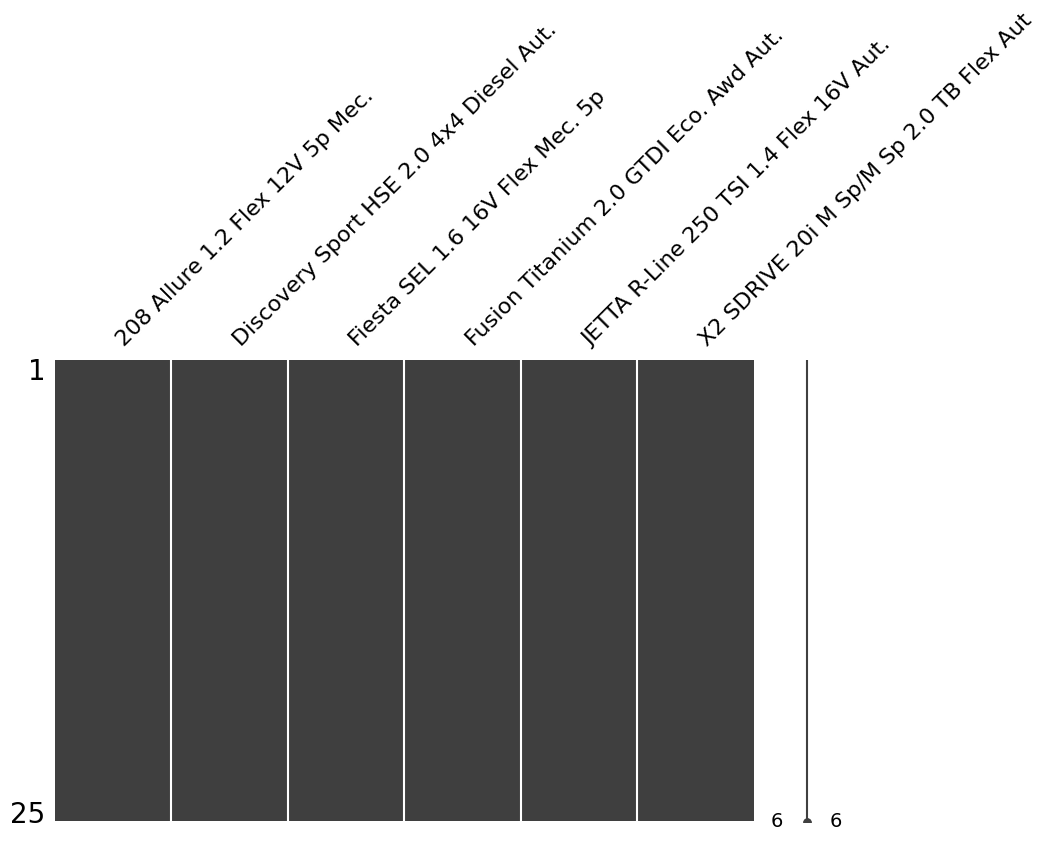

In [ ]:
# recuperando os nomes das colunas
col = list(dataset_tratado.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset_tratado.copy()

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos, figsize=(10, 6))